In [ ]:
!unzip /content/Water_Consumption_And_Cost__2013_-_Feb_2023_.csv.zip

Archive:  /content/Water_Consumption_And_Cost__2013_-_Feb_2023_.csv.zip
  inflating: Water_Consumption_And_Cost__2013_-_Feb_2023_.csv  


In [ ]:
import pandas as pd
NWC_DEMO_DATA = pd.read_csv('/content/Water_Consumption_And_Cost__2013_-_Feb_2023_.csv.zip')

In [ ]:
NWC_DEMO_DATA

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (HCF),Water&Sewer Charges,Other Charges
0,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91.0,240,Q009100,FEDERAL,...,01/26/2020,34.0,K13060723,N,196.35,Basic Water and Sewer,Yes,19,196.35,0.0
1,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91.0,240,Q009100,FEDERAL,...,02/24/2020,29.0,K13060723,N,258.35,Basic Water and Sewer,Yes,25,258.35,0.0
2,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91.0,240,Q009100,FEDERAL,...,03/23/2020,28.0,K13060723,N,217.02,Basic Water and Sewer,Yes,21,217.02,0.0
3,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91.0,240,Q009100,FEDERAL,...,04/23/2020,31.0,K13060723,N,103.34,Basic Water and Sewer,Yes,10,103.34,0.0
4,BAY VIEW,BROOKLYN,BAY VIEW,BLD 25 - Community Center,NONE,Community Center,92.0,670,K209200,MIXED FINANCE/LLC1,...,01/26/2020,34.0,E17250205,N,72.34,Basic Water and Sewer,Yes,7,72.34,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50310,WEST TREMONT AVENUE-SEDGWICK AVENUE AREA,BRONX,WEST TREMONT AVENUE-SEDGWICK AVENUE AREA,NaN,NaN,NaN,246.0,325,B024600,FEDERAL,...,09/21/2022,1.0,E13084395,N,43139.82,Basic Water and Sewer,Yes,204,43139.82,0.0
50311,WEST TREMONT AVENUE-SEDGWICK AVENUE AREA,BRONX,WEST TREMONT AVENUE-SEDGWICK AVENUE AREA,NaN,NaN,NaN,246.0,325,B024600,FEDERAL,...,12/20/2022,90.0,E13084395,N,33422.14,Basic Water and Sewer,Yes,204,33422.14,0.0
50312,WILLIAMSBURG,BROOKLYN,WILLIAMSBURG,BLD 13,AMR,STORE 23-26,2.0,325,K000200,FEDERAL,...,02/25/2022,58.0,K14211089,Y,73.61,Basic Water and Sewer,Yes,204,73.61,0.0
50313,WILLIAMSBURG,BROOKLYN,WILLIAMSBURG,BLD 21 - Community Center,AMR,Community Center,2.0,325,K200200,FEDERAL,...,02/23/2022,55.0,E15220518,N,63.71,Basic Water and Sewer,Yes,204,63.71,0.0


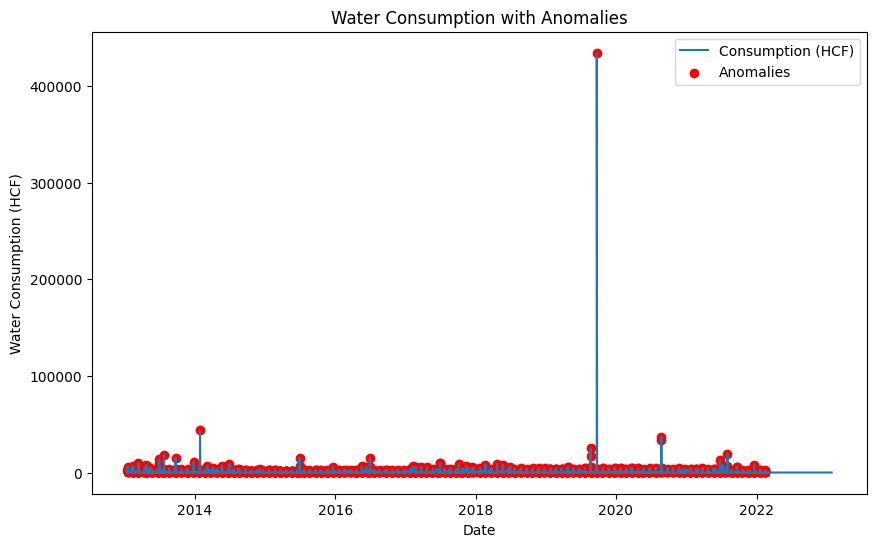

,Service End Date,Consumption (HCF),Anomaly
37538,2013-01-14,2479,-1
12865,2013-01-17,3676,-1
38370,2013-01-17,2441,-1
38449,2013-01-17,2333,-1
32962,2013-01-17,2315,-1


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Water_Consumption_And_Cost__2013_-_Feb_2023_.csv'
data = pd.read_csv(file_path)

# Preprocessing
# Convert 'Service End Date' to datetime format and sort by date
data['Service End Date'] = pd.to_datetime(data['Service End Date'])
data.sort_values(by='Service End Date', inplace=True)

# Select relevant features
# Here, we're focusing on 'Consumption (HCF)' as the primary indicator of anomalies
consumption_data = data[['Service End Date', 'Consumption (HCF)']].copy()

# Handling missing values (if any)
consumption_data.dropna(inplace=True)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict anomalies
consumption_data['Anomaly'] = iso_forest.fit_predict(consumption_data[['Consumption (HCF)']])

# Visualizing the anomalies
plt.figure(figsize=(10, 6))
plt.plot(consumption_data['Service End Date'], consumption_data['Consumption (HCF)'], label='Consumption (HCF)')
plt.scatter(consumption_data['Service End Date'][consumption_data['Anomaly'] == -1],
            consumption_data['Consumption (HCF)'][consumption_data['Anomaly'] == -1],
            color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Water Consumption (HCF)')
plt.title('Water Consumption with Anomalies')
plt.legend()
plt.show()

# Display the rows flagged as anomalies
anomalies = consumption_data[consumption_data['Anomaly'] == -1]
anomalies.head()


# Possible Interpretations:
The Large Spike Around 2020: This could indicate a significant event like a major leak, a malfunctioning meter, or a data recording error.

Smaller Spikes: These could be smaller leaks, unauthorized usage, or other irregularities that occurred throughout the years.

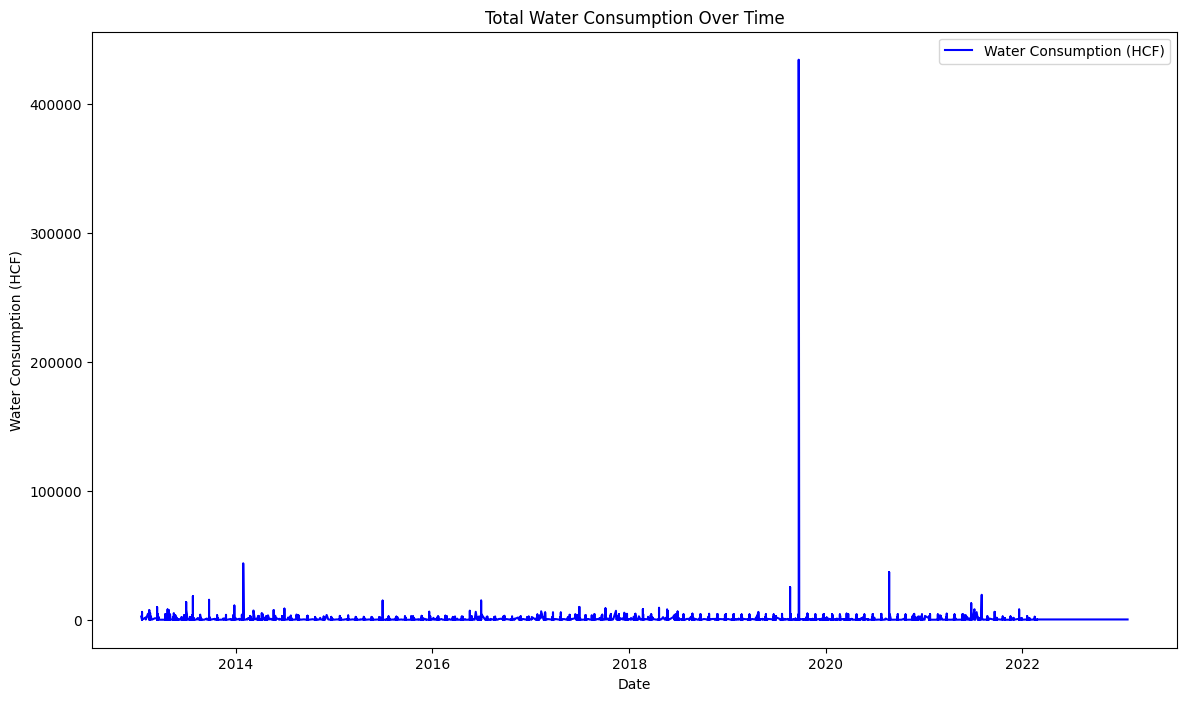

In [ ]:
import matplotlib.pyplot as plt

# Plot the total water consumption over time
plt.figure(figsize=(14, 8))
plt.plot(consumption_data['Service End Date'], consumption_data['Consumption (HCF)'], label='Water Consumption (HCF)', color='blue')
plt.xlabel('Date')
plt.ylabel('Water Consumption (HCF)')
plt.title('Total Water Consumption Over Time')
plt.legend()
plt.show()


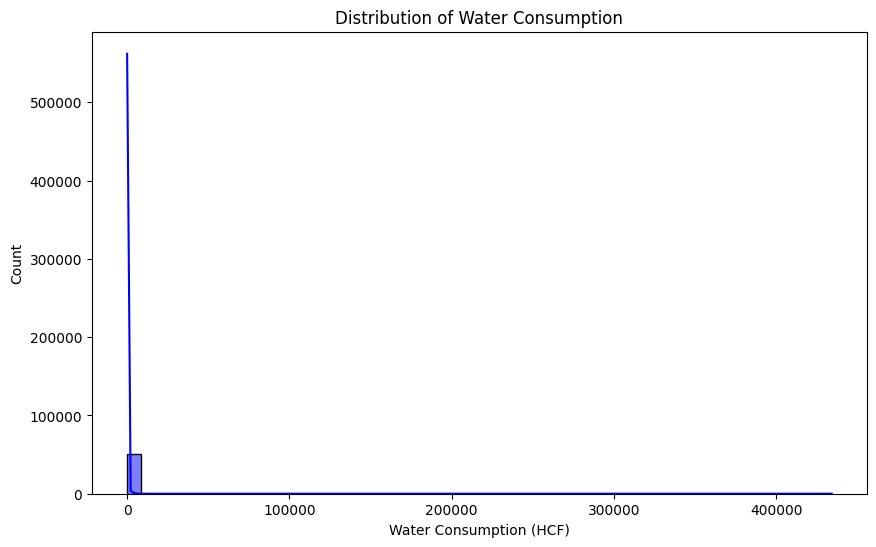

In [ ]:
import seaborn as sns

# Plot the distribution of water consumption
plt.figure(figsize=(10, 6))
sns.histplot(consumption_data['Consumption (HCF)'], bins=50, kde=True, color='blue')
plt.xlabel('Water Consumption (HCF)')
plt.title('Distribution of Water Consumption')
plt.show()


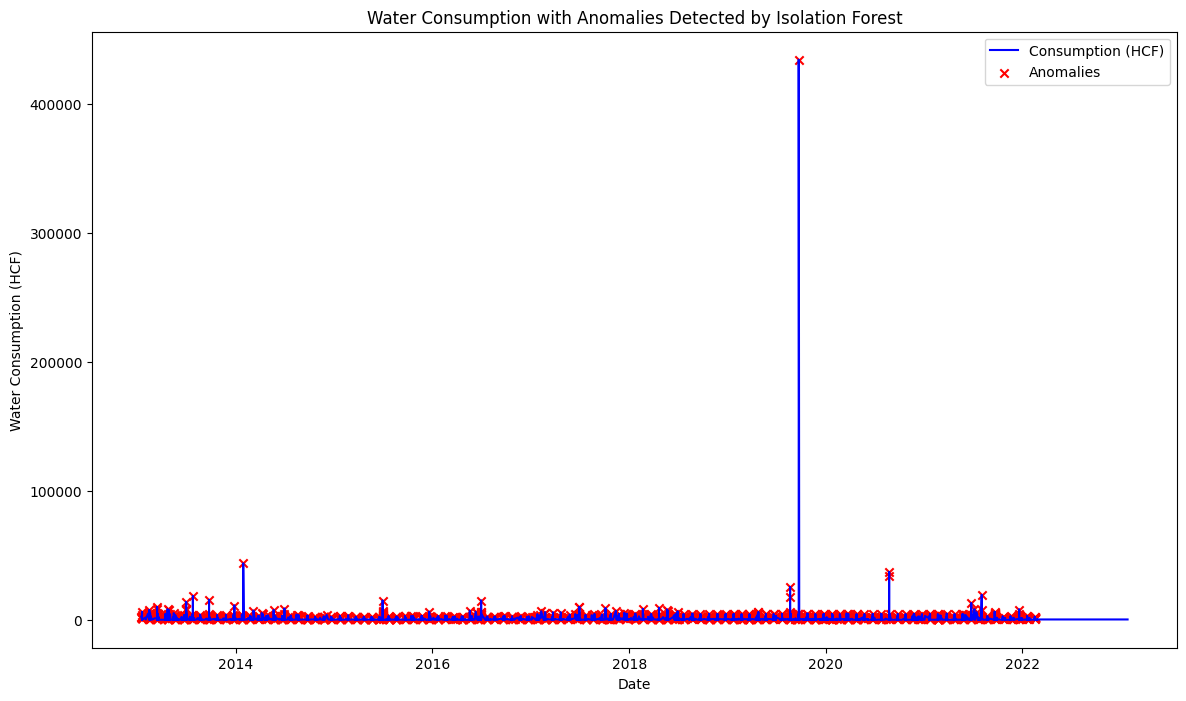

In [ ]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
consumption_data['Anomaly'] = iso_forest.fit_predict(consumption_data[['Consumption (HCF)']])

# Plot with enhanced visualization
plt.figure(figsize=(14, 8))
plt.plot(consumption_data['Service End Date'], consumption_data['Consumption (HCF)'], label='Consumption (HCF)', color='blue')
plt.scatter(consumption_data['Service End Date'][consumption_data['Anomaly'] == -1],
            consumption_data['Consumption (HCF)'][consumption_data['Anomaly'] == -1],
            color='red', label='Anomalies', marker='x')
plt.xlabel('Date')
plt.ylabel('Water Consumption (HCF)')
plt.title('Water Consumption with Anomalies Detected by Isolation Forest')
plt.legend()
plt.show()


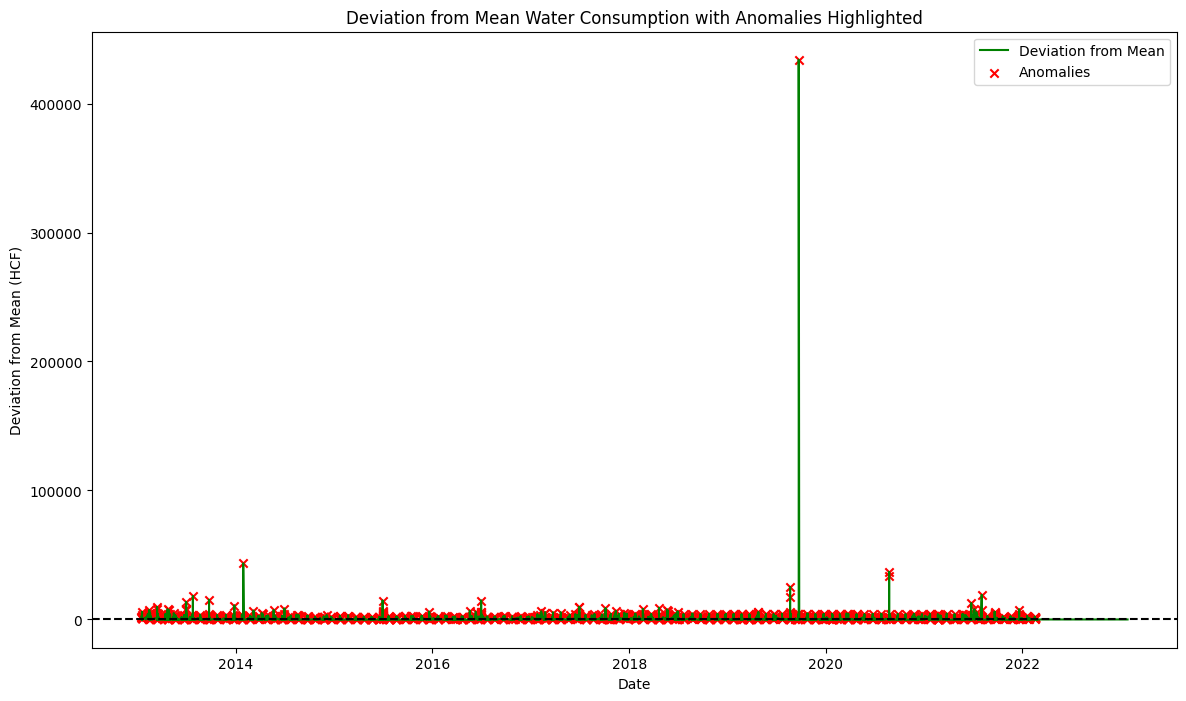

In [ ]:
import numpy as np

# Calculate deviation from the mean
mean_consumption = np.mean(consumption_data['Consumption (HCF)'])
consumption_data['Deviation from Mean'] = consumption_data['Consumption (HCF)'] - mean_consumption

# Plot the deviations
plt.figure(figsize=(14, 8))
plt.plot(consumption_data['Service End Date'], consumption_data['Deviation from Mean'], label='Deviation from Mean', color='green')
plt.scatter(consumption_data['Service End Date'][consumption_data['Anomaly'] == -1],
            consumption_data['Deviation from Mean'][consumption_data['Anomaly'] == -1],
            color='red', label='Anomalies', marker='x')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Deviation from Mean (HCF)')
plt.title('Deviation from Mean Water Consumption with Anomalies Highlighted')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-11-2b6828ffd51b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['Cluster'] = kmeans.labels_


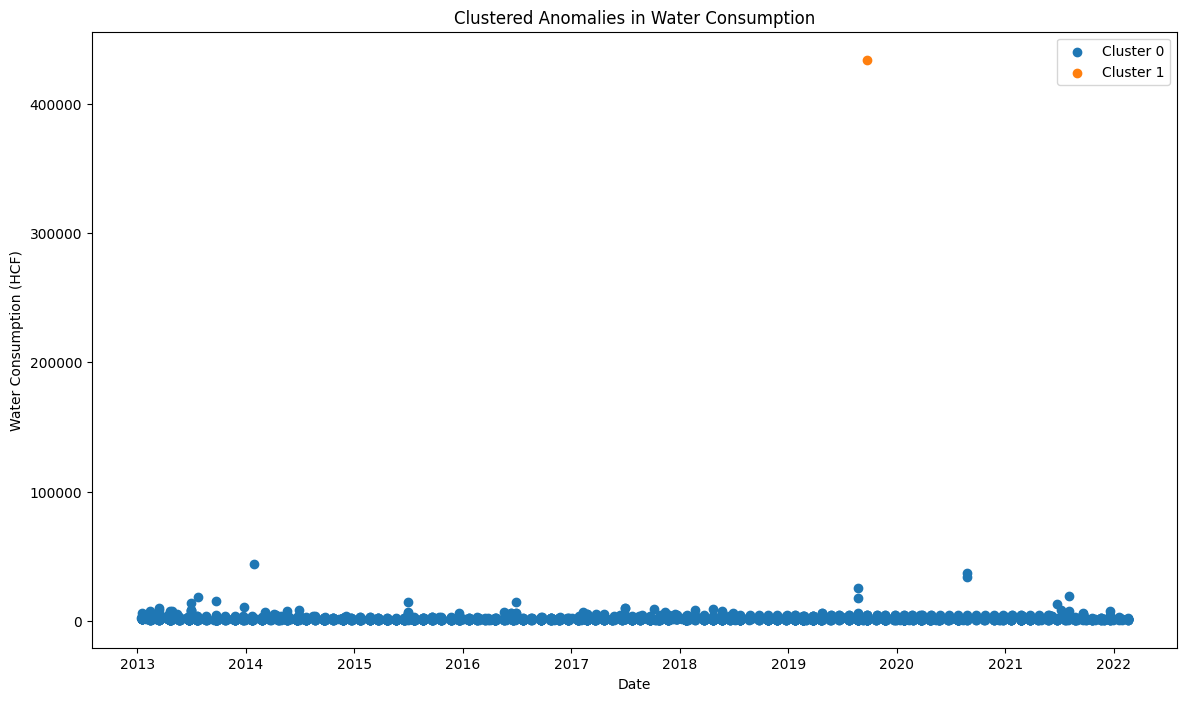

In [ ]:
from sklearn.cluster import KMeans

# Applying K-Means clustering to the anomalies
anomalies = consumption_data[consumption_data['Anomaly'] == -1]
kmeans = KMeans(n_clusters=2, random_state=42).fit(anomalies[['Consumption (HCF)']])
anomalies['Cluster'] = kmeans.labels_

# Visualizing clusters
plt.figure(figsize=(14, 8))
for cluster in anomalies['Cluster'].unique():
    clustered_data = anomalies[anomalies['Cluster'] == cluster]
    plt.scatter(clustered_data['Service End Date'], clustered_data['Consumption (HCF)'], label=f'Cluster {cluster}')
plt.xlabel('Date')
plt.ylabel('Water Consumption (HCF)')
plt.title('Clustered Anomalies in Water Consumption')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
consumption_data = pd.read_csv('/content/Water_Consumption_And_Cost__2013_-_Feb_2023_ (1).csv')

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0337 - val_loss: 5.7535e-06
Epoch 2/5
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2230e-05 - val_loss: 1.9562e-06
Epoch 3/5
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.2622e-05 - val_loss: 1.5229e-06
Epoch 4/5
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.3993e-05 - val_loss: 1.4717e-06
Epoch 5/5
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.5120e-05 - val_loss: 1.4821e-06
1573/1573 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


TypeError: 'value' must be an instance of str or bytes, not a float

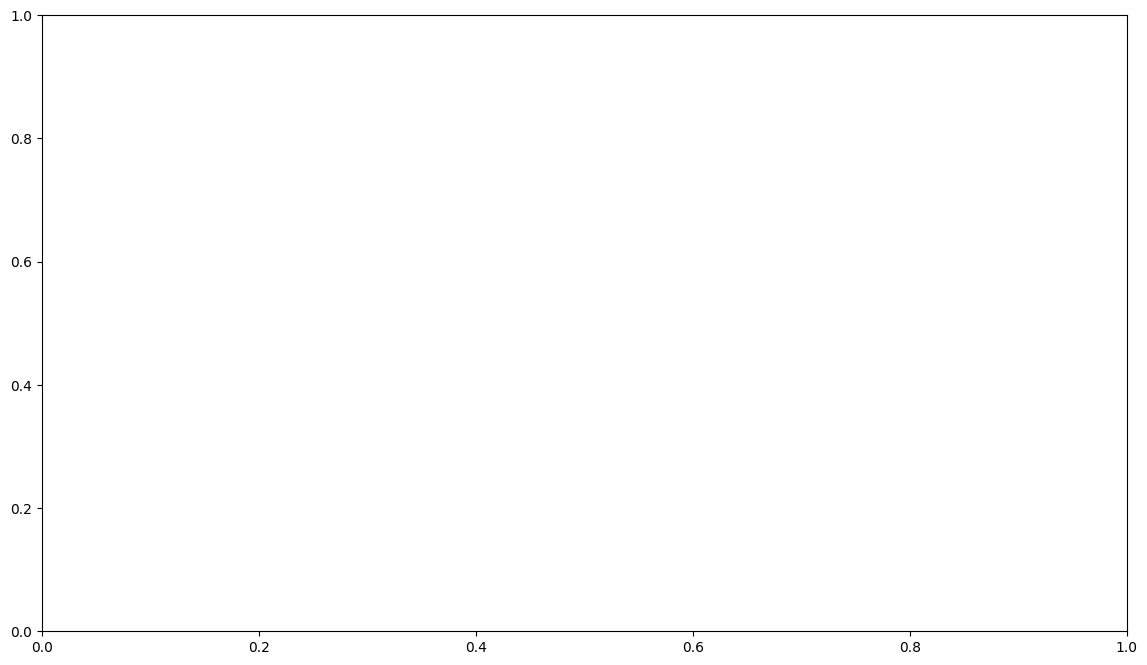

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(consumption_data[['Consumption (HCF)']])

# Define the Autoencoder model
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(scaled_data.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(scaled_data.shape[1], activation='sigmoid')
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(scaled_data, scaled_data, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

# Predict and calculate reconstruction error
reconstructions = model.predict(scaled_data)
mse = np.mean(np.power(scaled_data - reconstructions, 2), axis=1)

# Determine the threshold for anomaly detection
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

# Plot the anomalies
plt.figure(figsize=(14, 8))
plt.plot(consumption_data['Service End Date'], scaler.inverse_transform(scaled_data), label='Consumption (HCF)')
plt.scatter(consumption_data['Service End Date'][anomalies],
            scaler.inverse_transform(scaled_data)[anomalies],
            color='red', label='Anomalies', marker='x')
plt.xlabel('Date')
plt.ylabel('Water Consumption (HCF)')
plt.title('Water Consumption with Anomalies Detected by Autoencoder')
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
consumption_data['Cluster'] = dbscan.fit_predict(consumption_data)

# Visualize DBSCAN clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Consumption (HCF)', y='Current Charges', hue='Cluster', data=consumption_data, palette='viridis')
plt.title('Customer Segmentation Using DBSCAN')
plt.show()


ValueError: could not convert string to float: 'BAISLEY PARK'